# Data Exploration

In [1]:
#Join me as we explore the telco_churn data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from env import username, host, password

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn
from explore import get_obj_stats, get_num_stats, countplot, get_churn_heatmap

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics

from math import sqrt
from scipy import stats

In [45]:
num_vars = ['tenure','monthly_charges','total_charges']
obj_vars = list((df.columns).drop(num_vars))
target = 'churn'

In [42]:
def get_obj_stats(df):
    '''returns countplots of all object columns'''
    for i in obj_vars:
        sns.countplot(data=df, hue=i , x = target) 
        plt.show()

In [43]:
def get_num_stats(df):
    '''returns count plots of all numeric columns'''
    for i in num_vars:
        sns.countplot(data=df, hue=i , x = 'churn') 
        plt.show()

In [47]:
def get_churn_heatmap(df):
    '''returns a beautiful heatmap with correlations'''
    plt.figure(figsize=(8,12))
    churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    churn_heatmap.set_title('Features Correlated with Churn')

In [48]:
def get_metrics_binary(clf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    X_train, y_train = train[x_col], train[y_col]

    X_validate, y_validate = validate[x_col], validate[y_col]

    X_test, y_test = test[x_col], validate[y_col]

    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

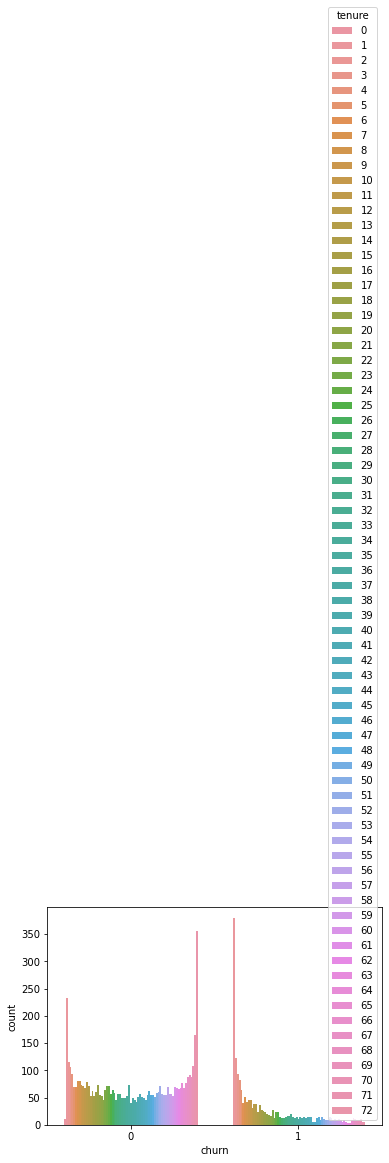

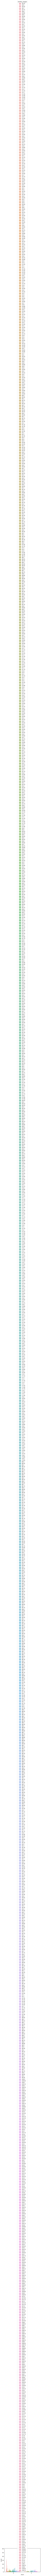

ValueError: Image size of 382x98034 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [46]:
get_num_stats(df)

In [44]:
def countplot(df):
    '''returns countplots of all columns in dataframe'''
    for i in df.columns:
        sns.countplot(data=df, x=i, hue='churn')
        plt.show()

In [33]:
df = get_telco_churn_data()

In [26]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [11]:
binary_df = clean_telco_churn(df)

In [36]:
df = clean_telco_churn(df)

In [28]:
df.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0030-FNXPP,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0031-PVLZI,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0098-BOWSO,0,0,0,27,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0107-WESLM,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0114-RSRRW,0,1,0,10,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   multiple_lines     7043 non-null   int64  
 7   online_security    7043 non-null   int64  
 8   online_backup      7043 non-null   int64  
 9   device_protection  7043 non-null   int64  
 10  tech_support       7043 non-null   int64  
 11  streaming_tv       7043 non-null   int64  
 12  streaming_movies   7043 non-null   int64  
 13  paperless_billing  7043 non-null   int64  
 14  monthly_charges    7043 non-null   float64
 15  total_charges      7043 non-null   float64
 16  churn              7043 

In [5]:
num_vars = ['tenure','monthly_charges','total_charges']
obj_vars = list((df.columns).drop(num_vars))
target = 'churn'

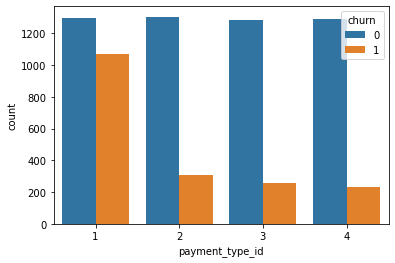

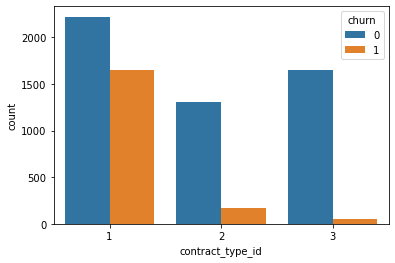

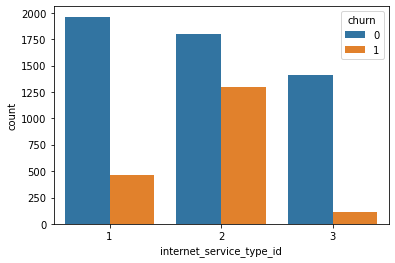

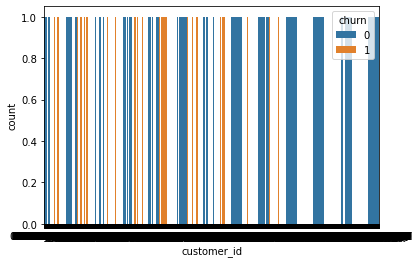

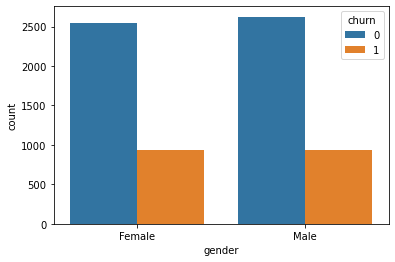

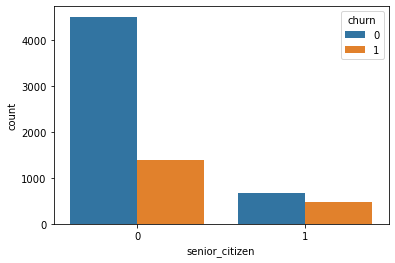

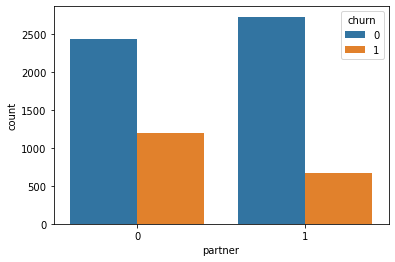

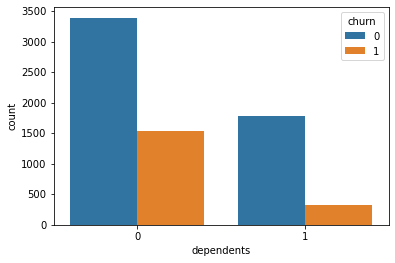

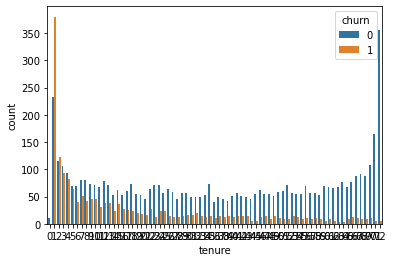

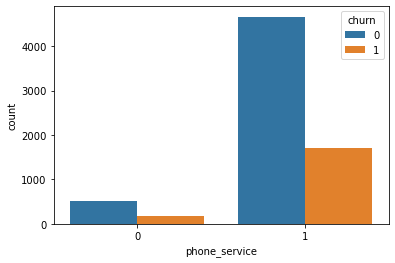

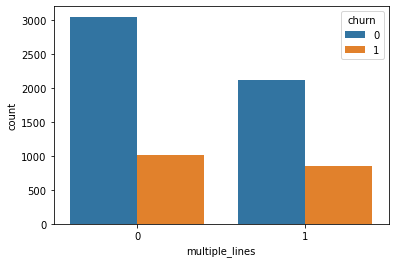

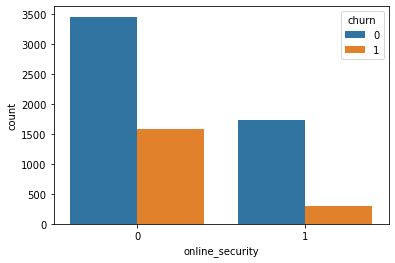

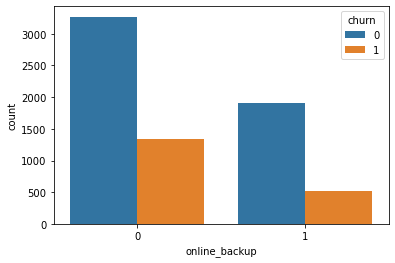

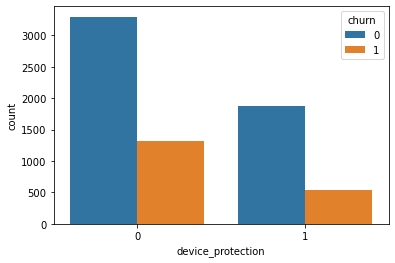

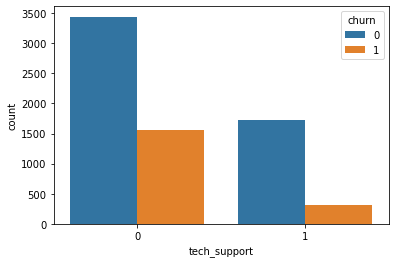

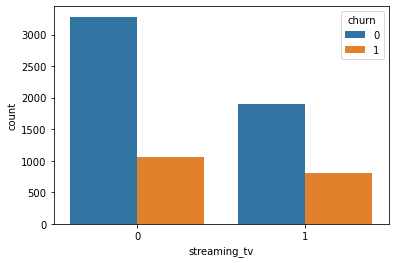

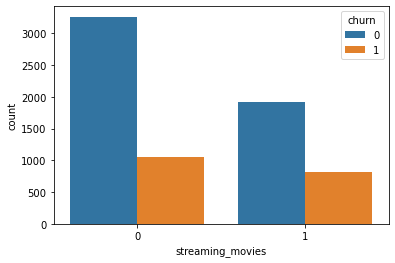

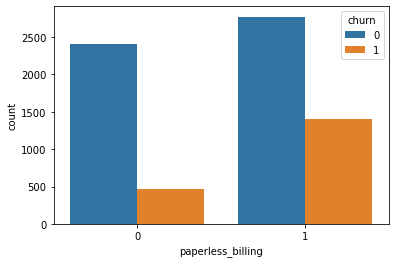

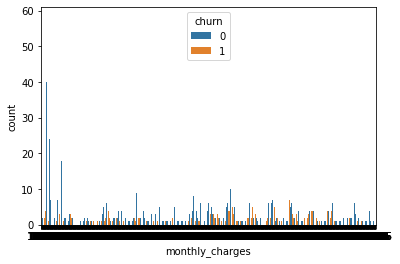

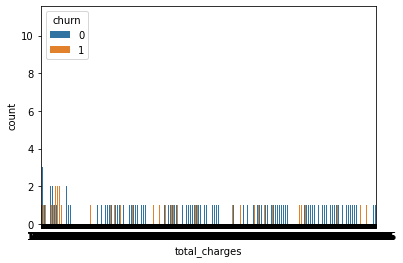

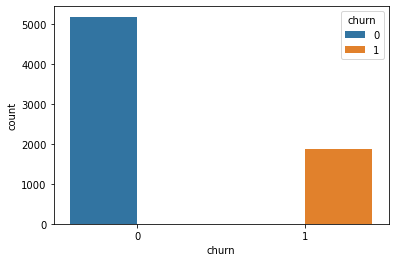

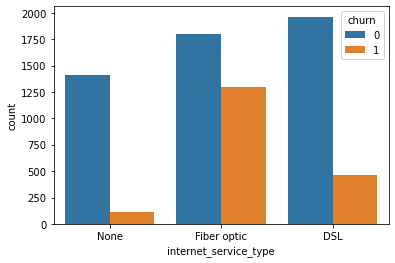

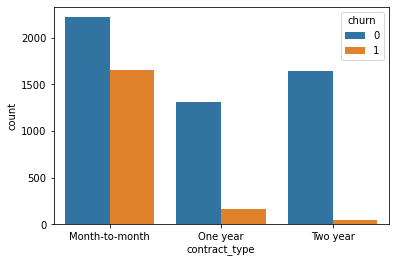

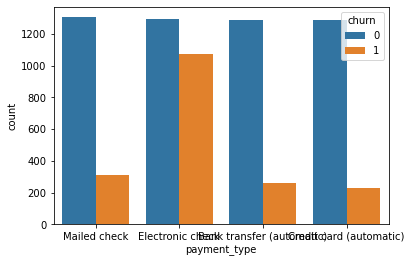

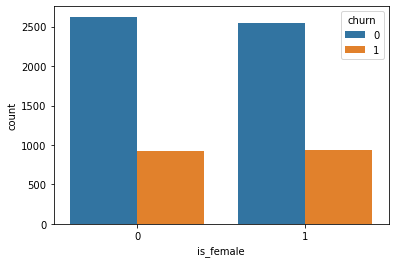

In [4]:
countplot(df)

In [ ]:
def get_obj_stats(df):
    for i in obj_vars:
        sns.countplot(data=df, hue=i , x = target) 
        plt.show()

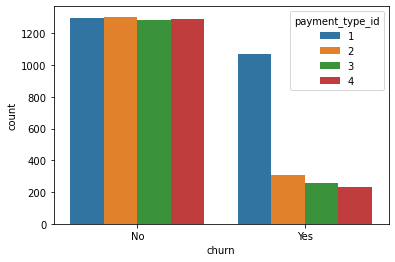

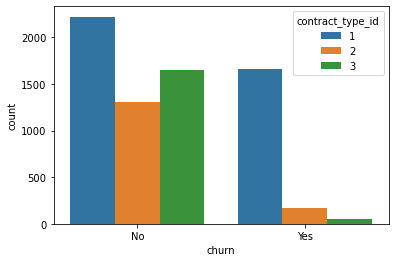

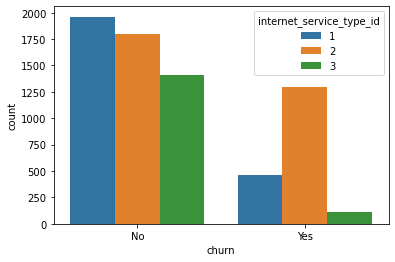

ValueError: Image size of 386x105714 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

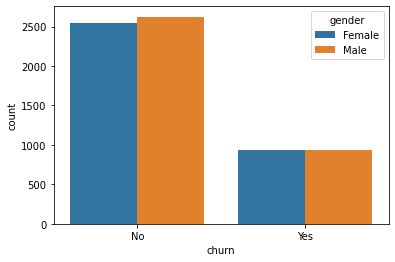

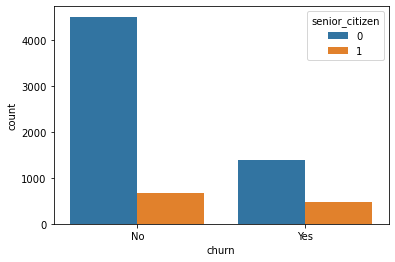

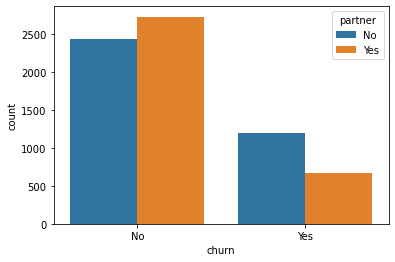

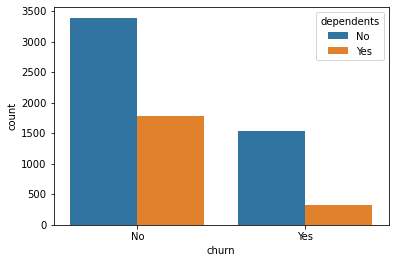

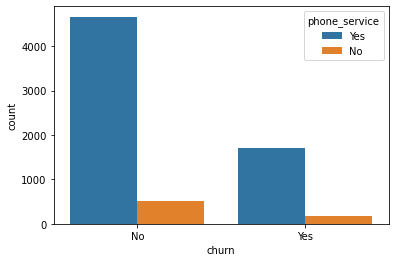

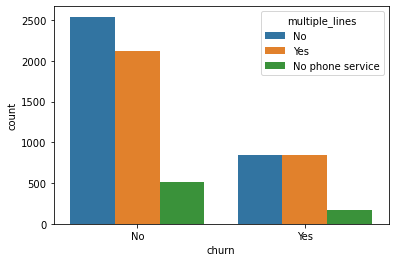

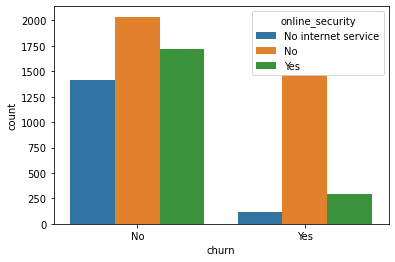

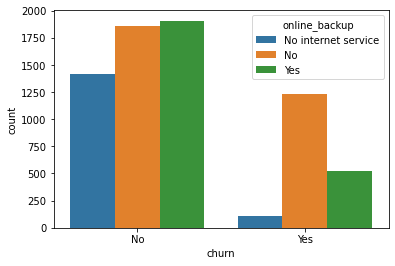

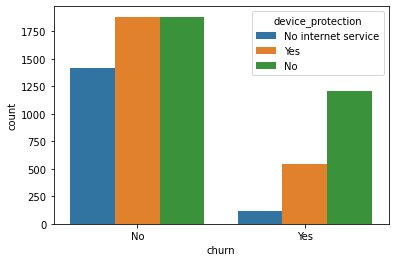

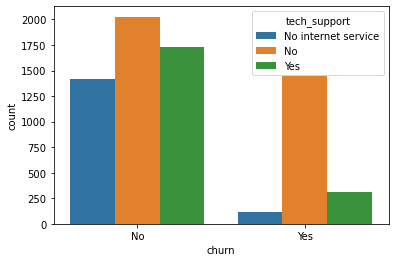

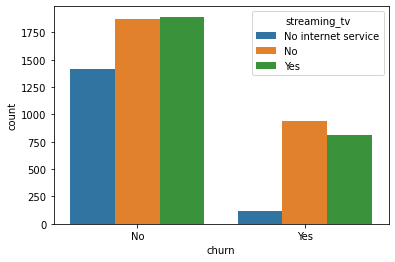

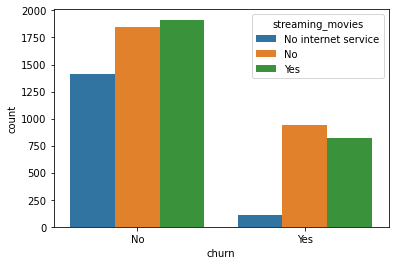

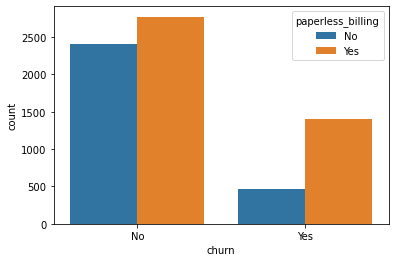

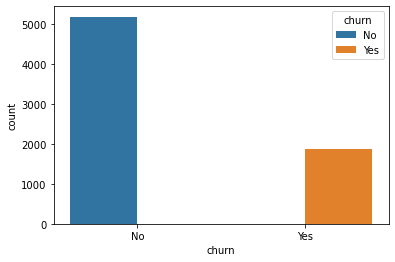

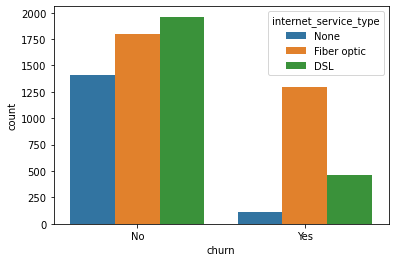

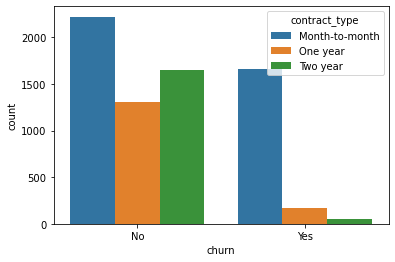

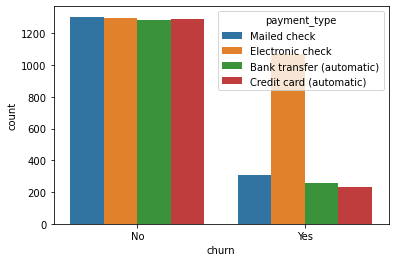

ValueError: Could not interpret input 'is_female'

In [34]:
get_obj_stats(df)

### Observations from Large Influx of Count Plots


-I am noticing that customers using fiber optic tend to churn more than other internet service types.

-Monthly customers are the largest churning group of the three contract types. 

-Customers on 2 year contracts tend to stay.

-Customers who pay with electronic check churn more than other payment types.

In [37]:
df.sample(50)
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

<AxesSubplot:title={'center':'Features Correlated with Churn'}>

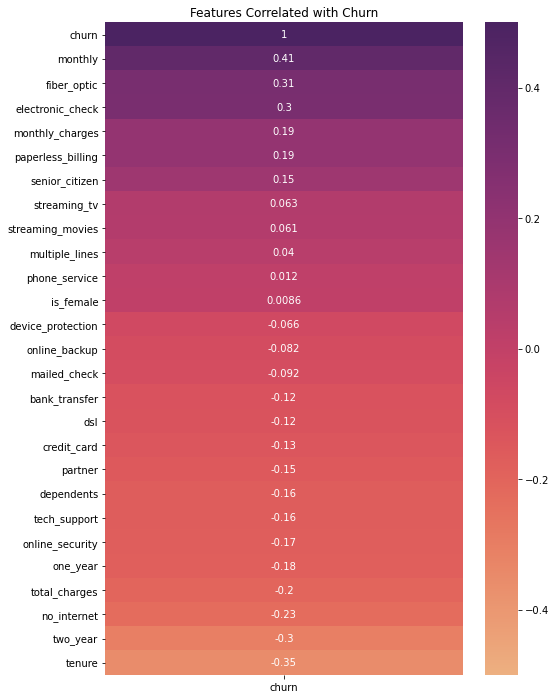

In [30]:
get_churn_heatmap(df)

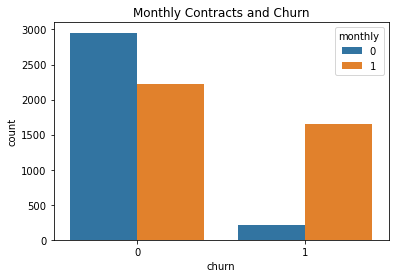

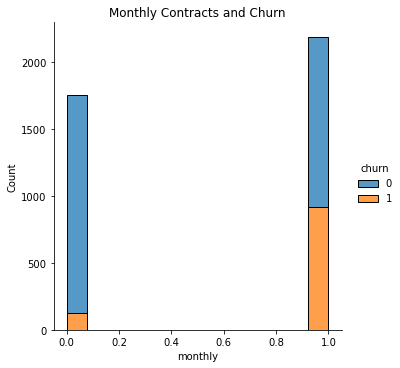

In [38]:
plt.subplots()
sns.countplot(data=df, hue='monthly' , x = 'churn') 
plt.title('Monthly Contracts and Churn')
plt.show()


sns.displot(train, x='monthly', hue = 'churn', multiple= 'stack')
plt.title('Monthly Contracts and Churn')
plt.show()

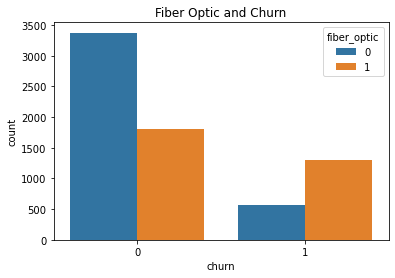

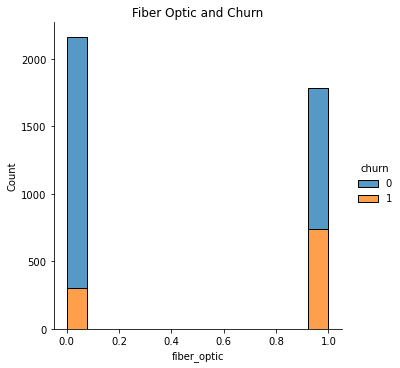

In [39]:
plt.subplots()
sns.countplot(data=df, hue='fiber_optic' , x = 'churn') 
plt.title('Fiber Optic and Churn')
plt.show()


sns.displot(train, x='fiber_optic', hue = 'churn', multiple= 'stack')
plt.title('Fiber Optic and Churn')
plt.show()

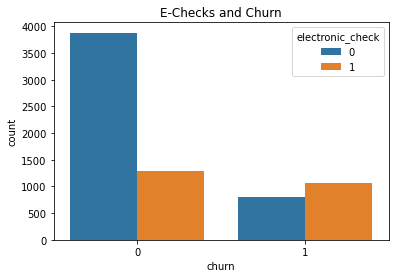

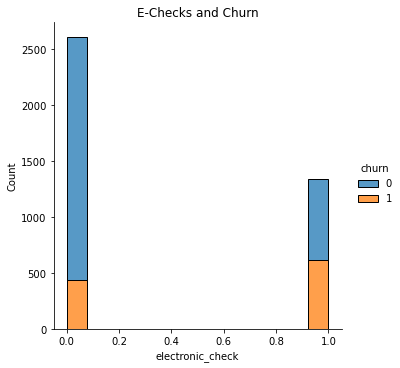

In [40]:
plt.subplots()
sns.countplot(data=df, hue='electronic_check' , x = 'churn') 
plt.title('E-Checks and Churn')
plt.show()


sns.displot(train, x='electronic_check', hue = 'churn', multiple= 'stack')
plt.title('E-Checks and Churn')
plt.show()

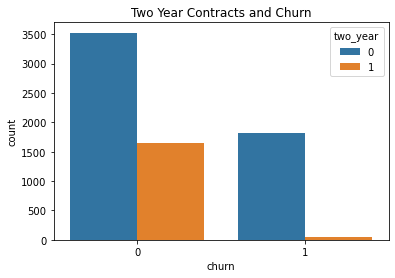

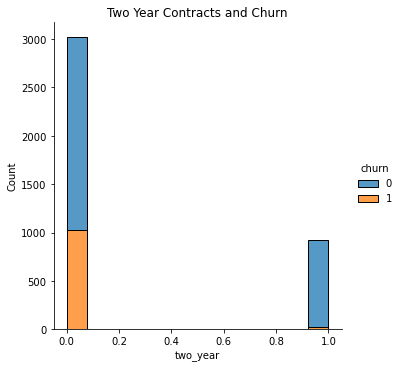

In [41]:
plt.subplots()
sns.countplot(data=df, hue='two_year' , x = 'churn') 
plt.title('Two Year Contracts and Churn')
plt.show()


sns.displot(train, x='two_year', hue = 'churn', multiple= 'stack')
plt.title('Two Year Contracts and Churn')
plt.show()

Text(0.5, 1.0, 'Tenure (in months) and Churn')

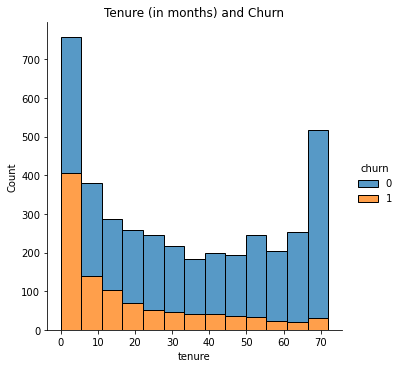

In [49]:
sns.displot(train, x="tenure",hue="churn", multiple='stack')
plt.title('Tenure (in months) and Churn')

In [54]:
df = get_telco_churn_data()

In [52]:
df = clean_telco_churn(df)

In [55]:
train, validate, test = prep_telco_churn(df)

Are two year contracted customers more likely to stay?

In [56]:
null_hypothesis = "Having a two year contract and churning are independent of each other."
alternative_hypothesis = "Having a two year contract and churning are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.two_year, train.churn, margins = True)
observed

churn,0,1,All
two_year,,,
0,1999,1022,3021
1,898,24,922
All,2897,1046,3943


In [57]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

3.2123527525742887e-75

In [58]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Having a two year contract and churning are independent of each other.
There is evidence to suggest: Having a two year contract and churning are not independent of each other.


Takeaways:
 - Customers with two year contracts tend to stay.
 - If contract type and churn were independent, we would expect 244 people to leave. However, only 24 did. 
 - Customers who sign a two year contract tend to be more loyal and satisifed with what Telco has to offer.
 - Penalties for leaving? 
 - It's probably saving them so much time.

Does length of customer tenure have affect on their likelihood to churn?

In [59]:
null_hypothesis = "Increasing tenure does not affect churn rate"
alternative_hypothesis = "Increasing tenure does affect churn rate"
a = 0.05 #a for alpha 

#this time we will be using a t test to compare means.
churned = train[train.churn==1]
stayed = train[train.churn==0]

t, p = stats.ttest_ind(churned.tenure, stayed.tenure)

In [60]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Increasing tenure does not affect churn rate
There is evidence to suggest: Increasing tenure does affect churn rate


Takeaways: 
 - Churn decreases as tenure increases. 
 - Reasonable, you'll stay with a company longer if you're happy with them.
 - Familiarity is a motive to stay.
 - Most customers churn within 0-10 months. 
 - Exponential decrease shape.

Do customers who use electronic checks to pay tend to leave?

In [63]:
null_hypothesis = "Paying with e-checks and churning are independent of each other."
alternative_hypothesis = "Paying with e-checks and churning are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.electronic_check, train.churn, margins = True)
observed

churn,0,1,All
electronic_check,,,
0,2173,434,2607
1,724,612,1336
All,2897,1046,3943


In [64]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

3.99605899267811e-82

In [65]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Paying with e-checks and churning are independent of each other.
There is evidence to suggest: Paying with e-checks and churning are not independent of each other.


Is a customer using fiber optic internet more likely to churn?

In [66]:
null_hypothesis = "Using fiber optic and churning are independent of each other."
alternative_hypothesis = "Using fiber optic and churning are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.fiber_optic, train.churn, margins = True)
observed

churn,0,1,All
fiber_optic,,,
0,1858,304,2162
1,1039,742,1781
All,2897,1046,3943


In [67]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

2.5087626354447297e-81

In [68]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Using fiber optic and churning are independent of each other.
There is evidence to suggest: Using fiber optic and churning are not independent of each other.


Is whether or not a customer churns independent of using monthly contracts?